# Tarea 3: Creación de redes a apartir de los resultados del CAD

- Rosa Huamaní Pucho (20200422)
---
- El ejercicio tiene como objetivo evidenciar las relaciones entre las instituciones que han sido premiadas en la última edición de Ciudadanos al Día (CAD 2023), tomando en cuenta las categorías en las que han sido nominadas y los resultados obtenidos, ya sea como Buenas Prácticas, Mención Honrosa, Finalista o Ganadora.

- Cabe señalar que existen un total de 21 categorías de premiación, de las cuales, por motivos de practicidad en la elaboración de la data, se han considerado solo siete: Gestión Interna, Transparencia y Acceso a la Información, Incidencia Pública, fiscalización y cumlimiento de la ley, desarollo infantil temprano, comunicación pública efectiva y compras públicas eficientes. De este modo, las conexiones entre las instituciones que se hallarán responderán a estas siete categorías.

- Toda la información ha sido extraída manualmente desde el visualizador de datos del CAD y del boletín informativo detallado sobre la premiación 2023.

## Paso 1: Cargamos la data

In [2]:
import networkx as nx

In [58]:
# Agregamos el link publicado del google sheets
from IPython.display import IFrame
IFrame("https://docs.google.com/spreadsheets/d/e/2PACX-1vTgFzH5FyDKFtJA8jBOud4inrENW_QPbIAUyKzhpPMOgDyFL3cVNf9MyWV5tglW-vbISTHwkKlvhfbI/pubhtml?gid=690333684&single=true",1200,350)

In [59]:
import pandas as pd
LinkToData="https://docs.google.com/spreadsheets/d/e/2PACX-1vTgFzH5FyDKFtJA8jBOud4inrENW_QPbIAUyKzhpPMOgDyFL3cVNf9MyWV5tglW-vbISTHwkKlvhfbI/pub?gid=690333684&single=true&output=csv"
CADdata = pd.read_csv(LinkToData,
                          index_col=0) #notice!!!!!

In [60]:
CADdata.head()

,AGN,Newmont ALAC,ATU,Banco de la Nación,Care Perú,CEBA Murrieta,Central de compras,Promperú,Devida,Concytec,...,Sunafil,Sunarp,UGEL 01,UGEL 05,UGEL 07,UGEL Oyón,Buena práctica,Mención honrosa,Finalista,Ganador
AGN,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
Newmont ALAC,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
ATU,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Banco de la Nación,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Care Perú,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [61]:
CADdata.columns #Revisamos las columnas

Index(['AGN', 'Newmont ALAC', 'ATU', 'Banco de la Nación', 'Care Perú',
       'CEBA Murrieta', 'Central de compras', 'Promperú', 'Devida', 'Concytec',
       'Contraloría', 'Corte superior Lima Sur', 'Cetpro Marinero ', 'Drelm ',
       'Electroperú', 'Fissal', 'Fonafe', 'Grupo distriluz', 'Imarpe',
       'Ingemmet', 'Indecopi', 'Instituto de salud (INS)',
       'Instituto Nacional del Niño (insnsb)', 'Internet para todos', 'JNE',
       'MINCETUR', 'MINCU', 'Ministerio de defensa', 'MIDIS', 'MEF', 'MINEDU',
       'MINEM', 'MIMP', 'MTPE', 'MTC', 'VIVIENDA', 'MINAM', 'MININTER',
       'Ministerio Público', 'Muni Barranco', 'Muni Jesús María',
       'Muni La Molina', 'Muni Mi Perú', 'Muni Miraflores',
       'Muni Puente piedra', 'Muni SJL', 'Muni San Miguel',
       'Muni Santiago de Surco', 'Muni metro de Lima', 'Newmont Yanacocha',
       'ONP', 'Oefa', 'Osiptel', 'Osinergmin', 'Ositran',
       'Poder Judicial del Perú', 'PNP', 'PCM', 'Cuna Más', 'Qali Warma',
       'JUNTOS', 

## Paso 2: Matriz de adyacencia

In [62]:
#categorías
varsToDrop=["Buena práctica","Mención honrosa","Finalista","Ganador"]
adjacency=CADdata.drop(varsToDrop,axis=1)

#result
adjacency

,AGN,Newmont ALAC,ATU,Banco de la Nación,Care Perú,CEBA Murrieta,Central de compras,Promperú,Devida,Concytec,...,SEAL,SBS,Sutran,Sunat,Sunafil,Sunarp,UGEL 01,UGEL 05,UGEL 07,UGEL Oyón
AGN,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
Newmont ALAC,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ATU,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Banco de la Nación,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Care Perú,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sunarp,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
UGEL 01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
UGEL 05,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
UGEL 07,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
# utilizamos la matriz para graficar
import networkx as nx
CADNet = nx.from_pandas_adjacency(adjacency)

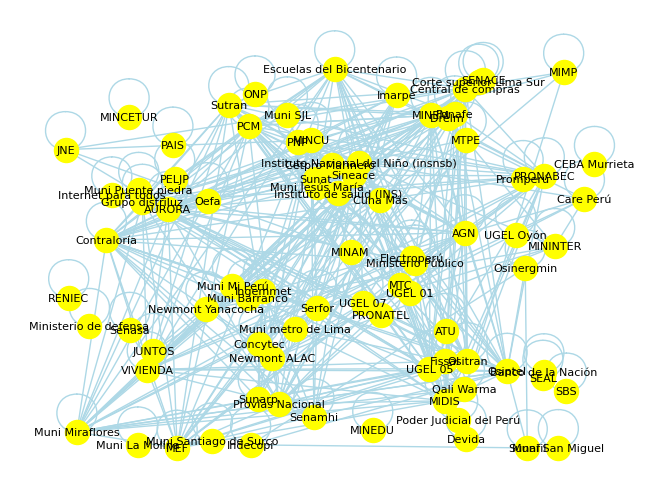

In [64]:
# plot
nx.draw_random(CADNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

In [65]:
# quitamos las autorrelaciones
CADNet.remove_edges_from(nx.selfloop_edges(CADNet))

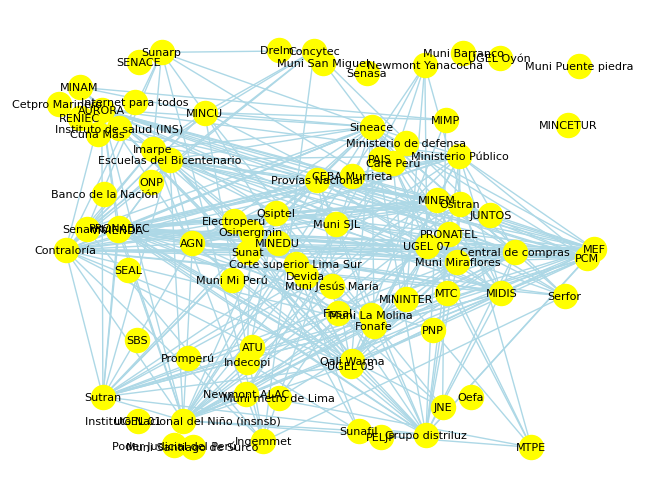

In [75]:
# ahora una mejor visualziación
nx.draw_random(CADNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)



In [66]:
# agregamos los atributos a la grafica
dict(zip(CADdata.index,CADdata['Buena práctica']))
dict(zip(CADdata.index,CADdata['Mención honrosa']))
dict(zip(CADdata.index,CADdata['Finalista']))
dict(zip(CADdata.index,CADdata['Ganador']))

{'AGN': 0,
 'Newmont ALAC': 0,
 'ATU': 0,
 'Banco de la Nación': 0,
 'Care Perú': 0,
 'CEBA Murrieta': 0,
 'Central de compras': 0,
 'Promperú': 0,
 'Devida': 0,
 'Concytec': 1,
 'Contraloría': 0,
 'Corte superior Lima Sur': 0,
 'Cetpro Marinero ': 0,
 'Drelm ': 0,
 'Electroperú': 0,
 'Fissal': 1,
 'Fonafe': 1,
 'Grupo distriluz': 0,
 'Imarpe': 0,
 'Ingemmet': 0,
 'Indecopi': 1,
 'Instituto de salud (INS)': 1,
 'Instituto Nacional del Niño (insnsb)': 0,
 'Internet para todos': 0,
 'JNE': 0,
 'MINCETUR': 0,
 'MINCU': 0,
 'Ministerio de defensa': 0,
 'MIDIS': 1,
 'MEF': 0,
 'MINEDU': 0,
 'MINEM': 0,
 'MIMP': 0,
 'MTPE': 0,
 'MTC': 1,
 'VIVIENDA': 0,
 'MINAM': 1,
 'MININTER': 0,
 'Ministerio Público': 0,
 'Muni Barranco': 0,
 'Muni Jesús María': 0,
 'Muni La Molina': 0,
 'Muni Mi Perú': 0,
 'Muni Miraflores': 0,
 'Muni Puente piedra': 0,
 'Muni SJL': 0,
 'Muni San Miguel': 0,
 'Muni Santiago de Surco': 0,
 'Muni metro de Lima': 0,
 'Newmont Yanacocha': 1,
 'ONP': 0,
 'Oefa': 1,
 'Osiptel'

In [67]:
attributeToAdd_1=dict(zip(CADdata.index,CADdata['Buena práctica']))
attributeToAdd_2=dict(zip(CADdata.index,CADdata['Mención honrosa']))
attributeToAdd_3=dict(zip(CADdata.index,CADdata['Finalista']))
attributeToAdd_4=dict(zip(CADdata.index,CADdata['Ganador']))

nx.set_node_attributes(CADNet, attributeToAdd_1, 'Buena práctica')
nx.set_node_attributes(CADNet, attributeToAdd_2, 'Mención honrosa')
nx.set_node_attributes(CADNet, attributeToAdd_3, 'Finalista')
nx.set_node_attributes(CADNet, attributeToAdd_4, 'Ganador')

## Paso 3: Graficamos con los atributos 

In [68]:
import matplotlib.pyplot as plt

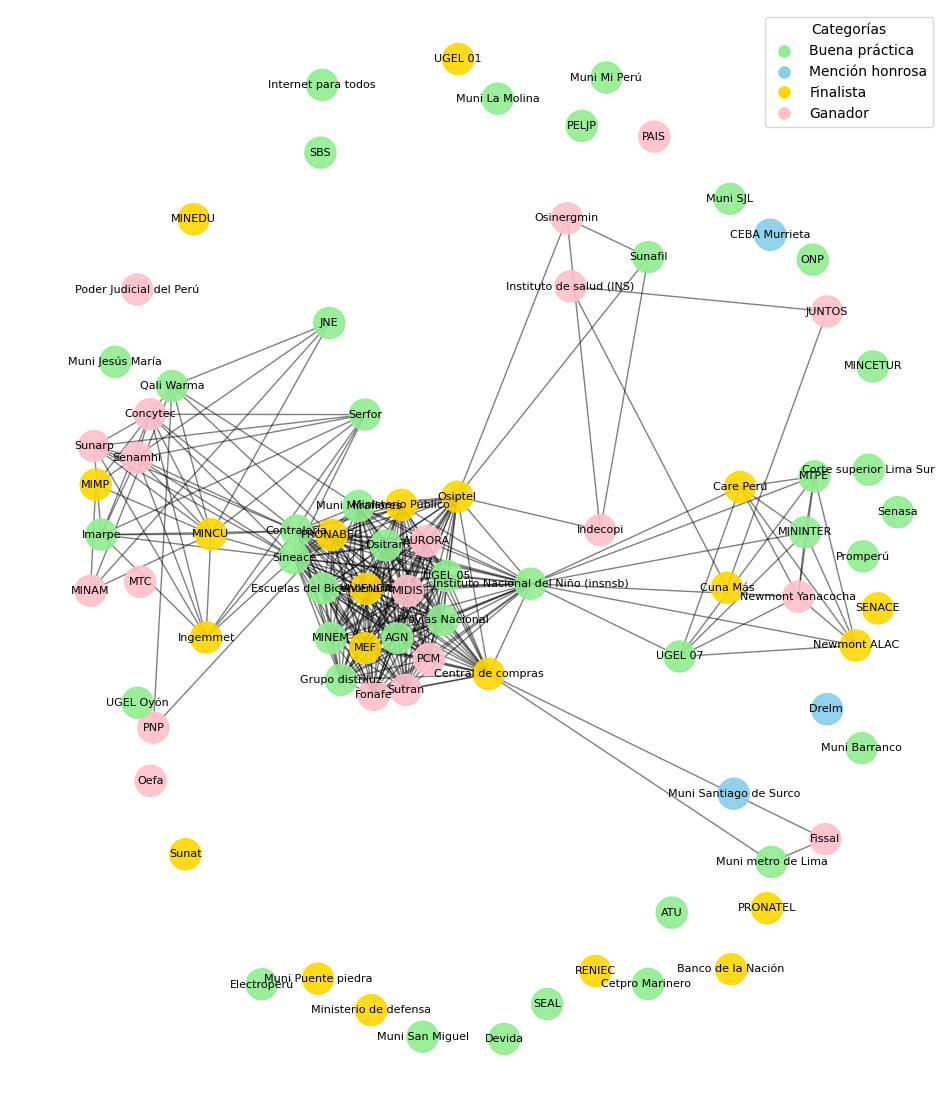

In [69]:

# categorías
colors = {
    node: ('lightgreen' if data.get('Buena práctica', 0) == 1 else
           'skyblue' if data.get('Mención honrosa', 0) == 1 else
           'gold' if data.get('Finalista', 0) == 1 else
           'pink' if data.get('Ganador', 0) == 1 else
           'grey')  # in case one of our categories doesn't fit 
    for node, data in CADNet.nodes(data=True)
}


nx.set_node_attributes(CADNet, colors, 'color')


plt.figure(figsize=(12, 14))

# Ajusta el layout para aumentar el espacio entre nodos
pos = nx.spring_layout(CADNet, k=0.8, iterations=50)  

# # Dibuja los nodos
nx.draw_networkx_nodes(CADNet, pos, node_size=500, node_color=[data['color'] for _, data in CADNet.nodes(data=True)], alpha=0.9)

# Names
nx.draw_networkx_labels(CADNet, pos, font_size=8, font_color='black')

nx.draw_networkx_edges(CADNet, pos, width=1, alpha=0.5)

# Guide with the names
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Buena práctica', markersize=10, markerfacecolor='lightgreen'),
    Line2D([0], [0], marker='o', color='w', label='Mención honrosa', markersize=10, markerfacecolor='skyblue'),
    Line2D([0], [0], marker='o', color='w', label='Finalista', markersize=10, markerfacecolor='gold'),
    Line2D([0], [0], marker='o', color='w', label='Ganador', markersize=10, markerfacecolor='pink')
]
plt.legend(handles=legend_elements, loc='upper right', title="Categorías")

plt.axis('off')  
plt.show()

In [70]:
#Revisamos la conectividad entre cada categoría

categorias = ['Buena práctica', 'Mención honrosa', 'Finalista', 'Ganador']
conectividad = {}

for categoria in categorias:
    nodos_categoria = [n for n, attr in CADNet.nodes(data=True) if attr.get(categoria, 0) == 1]
    subgrafo = CADNet.subgraph(nodos_categoria)
    conectividad[categoria] = nx.number_of_edges(subgrafo)  

for cat, conn in conectividad.items():
    print(f"Conectividad interna de {cat}: {conn}")

Conectividad interna de Buena práctica: 68
Conectividad interna de Mención honrosa: 0
Conectividad interna de Finalista: 18
Conectividad interna de Ganador: 15


## Paso 4: Análisis

In [71]:
len(CADNet.nodes),len(CADNet.edges)

(84, 313)

- De acuerdo al informe del CAD 2023, hubieron 84 instituciones que se presentaron a los premios, todas estas fueron consideradas en la BD
- Encontramos 313 aristas o conexiones entre los nodos

In [72]:
len(list(nx.connected_components(CADNet))) #Conectividad

38

- En cuanto a la cohesión, vemos que hay 38 subgrupos que estan conectados entre si más no con los demas, lo que indica una fragmentación de la red

In [73]:
# Estos son todos los nodos aislados
list(nx.isolates(CADNet))

['ATU',
 'Banco de la Nación',
 'CEBA Murrieta',
 'Promperú',
 'Devida',
 'Corte superior Lima Sur',
 'Cetpro Marinero ',
 'Drelm ',
 'Electroperú',
 'Internet para todos',
 'MINCETUR',
 'Ministerio de defensa',
 'MINEDU',
 'MTC',
 'Muni Barranco',
 'Muni Jesús María',
 'Muni La Molina',
 'Muni Mi Perú',
 'Muni Puente piedra',
 'Muni SJL',
 'Muni San Miguel',
 'Muni Santiago de Surco',
 'ONP',
 'Oefa',
 'Poder Judicial del Perú',
 'PRONATEL',
 'PAIS',
 'PELJP',
 'RENIEC',
 'SENACE',
 'Senasa',
 'SEAL',
 'SBS',
 'Sunat',
 'UGEL 01',
 'UGEL Oyón']

In [74]:
#just for the largest component
largest_cc_nodes = max(nx.connected_components(CADNet), key=len)
CADNet_largest=CADNet.subgraph(largest_cc_nodes)

nx.diameter(CADNet_largest)

4

El diámetro del componente más grande es 4, lo que indica que la distancia de un nodo a otro es de cuatro pasos (aristas)

In [76]:
# geodesics
geodesics = dict(nx.all_pairs_shortest_path_length(CADNet))

# as matrix
MatrixGeo = [[geodesics.get(n,{}).get(m)  for m in CADNet.nodes] for n in CADNet.nodes]

# as DF (pandas)
MatrixGeo_DF=pd.DataFrame(MatrixGeo,index=CADNet.nodes, columns=CADNet.nodes)

# we get
MatrixGeo_DF

,AGN,Newmont ALAC,ATU,Banco de la Nación,Care Perú,CEBA Murrieta,Central de compras,Promperú,Devida,Concytec,...,SEAL,SBS,Sutran,Sunat,Sunafil,Sunarp,UGEL 01,UGEL 05,UGEL 07,UGEL Oyón
AGN,0.0,2.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN,2.0,...,NaN,NaN,1.0,NaN,2.0,2.0,NaN,1.0,2.0,NaN
Newmont ALAC,2.0,0.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,3.0,...,NaN,NaN,2.0,NaN,3.0,3.0,NaN,2.0,1.0,NaN
ATU,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Banco de la Nación,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Care Perú,2.0,1.0,NaN,NaN,0.0,NaN,2.0,NaN,NaN,3.0,...,NaN,NaN,2.0,NaN,3.0,3.0,NaN,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sunarp,2.0,3.0,NaN,NaN,3.0,NaN,2.0,NaN,NaN,1.0,...,NaN,NaN,2.0,NaN,3.0,0.0,NaN,2.0,3.0,NaN
UGEL 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
UGEL 05,1.0,2.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN,2.0,...,NaN,NaN,1.0,NaN,2.0,2.0,NaN,0.0,2.0,NaN
UGEL 07,2.0,1.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,3.0,...,NaN,NaN,2.0,NaN,3.0,3.0,NaN,2.0,0.0,NaN


- Los valores en la tabla son las distancias geodésicas, cada valor indica cuantos pasos son necesario para llegar a otro mas si aparec eun NaN est indica que no existe tal piosibildiad de conexión. 

In [77]:
import numpy as np

pd.DataFrame(np.unique(MatrixGeo_DF.values, return_counts=True),index=['valor','freq']).T.set_index('valor')

,freq
valor,
0.0,84.0
1.0,626.0
2.0,904.0
3.0,390.0
4.0,66.0
NaN,4986.0


Se observa que hay 84 nodos autoconectados, 626 conexiones con otros nodos y un número decreciente de conexiones que requieren más pasos, con 904, 390 y 66 conexiones para dos, tres y 4 pasos respectivamente. No obstante, 4986 pares de nodos no tienen conexión, destacando una significativa falta de cohesión en la red para las tres categorías utilizadas. 

In [78]:
MatrixReach_DF=(MatrixGeo_DF>0).replace({True:1,False:0})
MatrixReach_DF

C:\Users\maria\AppData\Local\Temp\ipykernel_8368\3592291340.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MatrixReach_DF=(MatrixGeo_DF>0).replace({True:1,False:0})


,AGN,Newmont ALAC,ATU,Banco de la Nación,Care Perú,CEBA Murrieta,Central de compras,Promperú,Devida,Concytec,...,SEAL,SBS,Sutran,Sunat,Sunafil,Sunarp,UGEL 01,UGEL 05,UGEL 07,UGEL Oyón
AGN,0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,1,1,0,1,1,0
Newmont ALAC,1,0,0,0,1,0,1,0,0,1,...,0,0,1,0,1,1,0,1,1,0
ATU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Banco de la Nación,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Care Perú,1,1,0,0,0,0,1,0,0,1,...,0,0,1,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sunarp,1,1,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,1,0
UGEL 01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
UGEL 05,1,1,0,0,1,0,1,0,0,1,...,0,0,1,0,1,1,0,0,1,0
UGEL 07,1,1,0,0,1,0,1,0,0,1,...,0,0,1,0,1,1,0,1,0,0


In [79]:
# connectedness
nNodes=len(CADNet.nodes)
MatrixReach_DF.sum().sum()/(nNodes*(nNodes-1))

np.float64(0.2848537005163511)

El valor de 0.284 indica que, en promedio, solo el 28.4% de los pares de nodos están conectados directamente o indirectamente dentro de esta red, reflejando considerable de conectividad total.

In [80]:
# geodesics
geodesics_Lcc = dict(nx.all_pairs_shortest_path_length(CADNet_largest))

# as matrix
MatrixGeo_Lcc = [[geodesics_Lcc.get(n,{}).get(m)  for m in CADNet_largest.nodes] for n in CADNet_largest.nodes]

# as DF (pandas)
MatrixGeo_DF_Lcc=pd.DataFrame(MatrixGeo_Lcc,index=CADNet_largest.nodes, columns=CADNet_largest.nodes)

# we get
MatrixGeo_DF_Lcc

,AGN,Newmont ALAC,Care Perú,Central de compras,Concytec,Contraloría,Fissal,Fonafe,Grupo distriluz,Imarpe,...,Provías Nacional,Escuelas del Bicentenario,Senamhi,Serfor,Sineace,Sutran,Sunafil,Sunarp,UGEL 05,UGEL 07
AGN,0,2,2,1,2,1,2,1,1,2,...,1,1,2,2,1,1,2,2,1,2
Newmont ALAC,2,0,1,2,3,2,3,2,2,3,...,2,2,3,3,2,2,3,3,2,1
Care Perú,2,1,0,2,3,2,3,2,2,3,...,2,2,3,3,2,2,3,3,2,1
Central de compras,1,2,2,0,2,1,1,1,1,2,...,1,1,2,2,1,1,2,2,1,2
Concytec,2,3,3,2,0,1,3,2,2,1,...,2,2,1,1,1,2,3,1,2,3
Contraloría,1,2,2,1,1,0,2,1,1,1,...,1,1,1,1,1,1,2,1,1,2
Fissal,2,3,3,1,3,2,0,2,2,3,...,2,2,3,3,2,2,3,3,2,3
Fonafe,1,2,2,1,2,1,2,0,1,2,...,1,1,2,2,1,1,2,2,1,2
Grupo distriluz,1,2,2,1,2,1,2,1,0,2,...,1,1,2,2,1,1,2,2,1,2
Imarpe,2,3,3,2,1,1,3,2,2,0,...,2,2,1,1,1,2,3,1,2,3


In [81]:
MatrixReach_DF_Lcc=(MatrixGeo_DF_Lcc>0).replace({True:1,False:0})
MatrixReach_DF_Lcc

C:\Users\maria\AppData\Local\Temp\ipykernel_8368\1148812125.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MatrixReach_DF_Lcc=(MatrixGeo_DF_Lcc>0).replace({True:1,False:0})


,AGN,Newmont ALAC,Care Perú,Central de compras,Concytec,Contraloría,Fissal,Fonafe,Grupo distriluz,Imarpe,...,Provías Nacional,Escuelas del Bicentenario,Senamhi,Serfor,Sineace,Sutran,Sunafil,Sunarp,UGEL 05,UGEL 07
AGN,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Newmont ALAC,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Care Perú,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Central de compras,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Concytec,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Contraloría,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Fissal,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Fonafe,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
Grupo distriluz,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
Imarpe,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


En este tabla 1 representa una relación entre 2 nodos mientras que 0 sugiere lo contrario

In [86]:
nNodes=len(CADNet_largest.nodes)
MatrixReach_DF_Lcc.sum().sum()/(nNodes*(nNodes-1))

np.float64(1.0)

In [83]:
nx.density(CADNet_largest)

0.31313131313131315

In [84]:
actorMeasures=pd.concat([pd.DataFrame.from_dict(nx.degree_centrality(CADNet_largest),
                                  orient='index',
                                  columns=['Degree']),
           pd.DataFrame.from_dict(nx.closeness_centrality(CAD),
                                  orient='index',
                                  columns=['Closeness']),
           pd.DataFrame.from_dict(nx.betweenness_centrality(CAD),
                                  orient='index',
                                  columns=['Betweenness'])],axis=1)
## data
actorMeasures

,Degree,Closeness,Betweenness
AGN,0.477273,0.628571,0.000000
Newmont ALAC,0.136364,0.431373,0.000000
Care Perú,0.136364,0.431373,0.000000
Central de compras,0.522727,0.647059,0.088795
Concytec,0.181818,0.478261,0.000000
Contraloría,0.636364,0.733333,0.139447
Fissal,0.045455,0.400000,0.000000
Fonafe,0.477273,0.628571,0.000000
Grupo distriluz,0.477273,0.628571,0.000000
Imarpe,0.181818,0.478261,0.000000


- Degree (Grado): Mide cuántas conexiones directas tiene un nodo. Así, la Contraloría tiene el valor más alto (0.636364), lo que significa que es el nodo con más conexiones directas en la red.
Interpretación: La Contraloría probablemente interactúa o se comunica directamente con muchos otros actores en la red.


- Closeness (Cercanía): Mide qué tan cerca está un nodo de todos los demás nodos en la red. Por ejemplo, la Contraloría también tiene el valor más alto de cercanía (0.733333). La Contraloría puede alcanzar o comunicarse con otros nodos en la red más rápidamente que cualquier otro actor.

- Betweenness (Intermediación): Mide cuántas veces un nodo actúa como puente a lo largo del camino más corto entre otros dos nodos. El Instituto Nacional del Niño (insnsb) tiene el valor más alto (0.241015). 

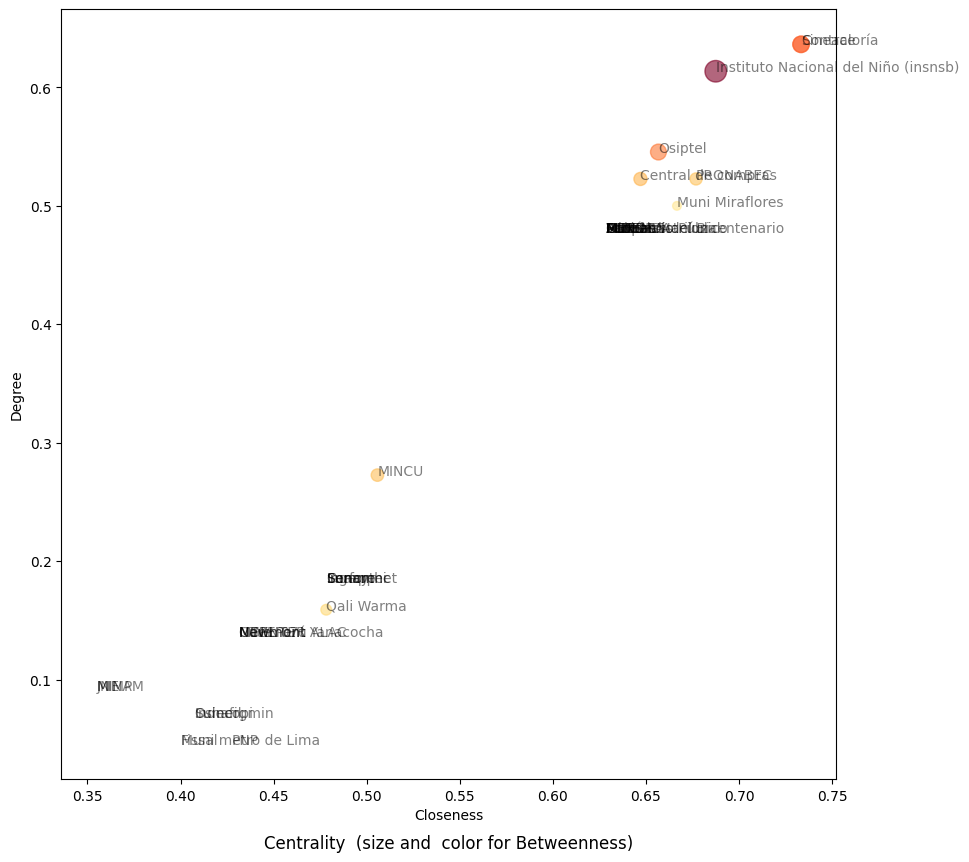

In [85]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10)) #Graficamos

ax.scatter(actorMeasures.Closeness, actorMeasures.Degree,s=1000*actorMeasures.Betweenness,
           c=100*actorMeasures.Betweenness,
           cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate=zip(actorMeasures.index,actorMeasures.Closeness,actorMeasures.Degree)
for name,coordX,coordY in valsForAnnotate:
    ax.annotate(name, (coordX,coordY),alpha=0.5)

plt.title("Centrality  (size and  color for Betweenness)", y=-0.1)
plt.xlabel("Closeness")
plt.ylabel("Degree")
plt.show()

## Conclusiones

- Encontramos que la Contraloría, Sineace y el Instituto Nacional del Niño (insnsb) tienen alto Degree, alta Closeness y alta Betweenness y por tanto son los actores más centrales e influyentes en la red pese a no ser calificados como Ganadores en el CAD y mas bien tienen el reconocimiento de menor rango (buena práctica), lo que puede indicar que son las instituciones de esta categorías las que llegan a tener más relaciones en comparación con las que obtienen resultados de Ganador. Es decir, estas instituciones comparten en común categorias con las demás instituciones.

- Por otro lado, Fissal, indecopi y la PNP que son instituciones ganadoras del premio tiene valores bajos en todas las medidas por lo tanto son instituciones con menor influencia en la red, lo que puede indicar que sus postulaciones son más exclusivas y reducidas a muy pocas categorías de modo que aseguren su victoria.

- En definitiva, el grado de conectividad en general al ser de 28.4% puede explicarse en primera por la falta de las demás categorias del premio, ya que solo se tomo en consideración 7, no obstante para tratarse de esta cantidad la conectividad no es baja. 